In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Carga el dataset y mis imports

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

originalDF = pd.read_csv('./Database/Concrete_Data_Yeh.csv', header=0, delimiter=',')

## 3. Descenso de gradiente (A)

In [3]:
class Regressor(object):
    def __init__(self, alpha, x_values, y_values):
        #Creamos un array con todos los pesos
        self.w = np.zeros(x_values.shape[1])
        
        self.alpha = alpha
        
        self.y_values = y_values
        self.x_values = x_values 
        
    
    def train(self, max_iter):
        # Entrenar durant max_iter iteracions
        m = len(self.y_values)
        cost_history = [0] * max_iter
        for it in range(max_iter):
            predict = self.x_values.dot(self.w) #calculem la prediccio
            loss = predict - self.y_values #calculem la perduda
            gradient = self.x_values.T.dot(loss) / m #calculem el gradient
            self.w = self.w - self.alpha * gradient #actualitzem els pesos
            cost = self.cost_function() # #calculem nou cost
            cost_history[it] = cost
           
        
        return self.w, cost_history
    
    def predict(self, x):
        predict = x.dot(self.w)
        return predict
    
    
    def cost_function(self):
        m = len(self.y_values)
        j = np.sum((self.x_values.dot(self.w) - self.y_values) ** 2) / (2 * m)
        return j
    
#calcula el score    
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return r2

Esta clase se encargara de almacenar i actualizar los pesos de cada atributo, mientras que la funcion r2 nos devolverá el score de nuestro modelo.

### Creación del modelo

Ahora simplemente semparamos nuestros datos estandarizados en train y test y creamos nuestro modelo con un learning rate y unas iteraciones arbitrarias e iremos probando hasta conseguir un buen resultado.

In [4]:
sqrtThenStdDF = np.sqrt(originalDF);
standardScaler = preprocessing.StandardScaler()
sqrtThenStdDF = pd.DataFrame(standardScaler.fit_transform(sqrtThenStdDF))
sqrtThenStdDF.columns = originalDF.columns

# separamos los datos en train y test
xTrain, xTest, yTrain, yTest = train_test_split(sqrtThenStdDF.values[:,:8], sqrtThenStdDF.values[:,8], test_size=0.2) 

Text(0.5, 1.0, 'Coste por iteracion \n coste minimo: 0.1364435336441663 \n learning rate: 0.95 \n score -60867162.84263664')

Text(0.5, 0, 'cost')

Text(0, 0.5, 'iteraciones')

Text(0, 0.5, 'Pesos atributs')

[]

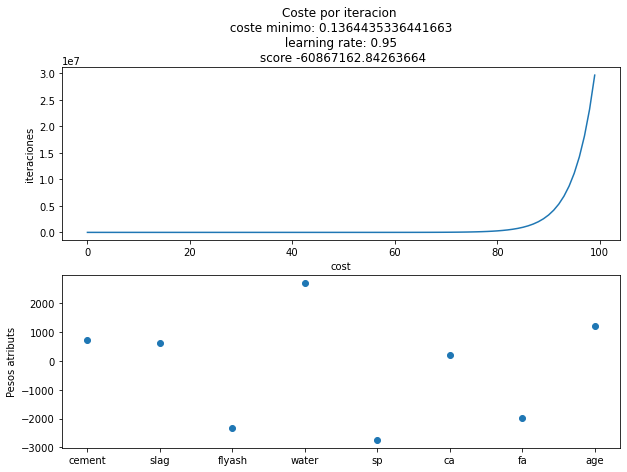

In [5]:
learningrate = 0.95
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100
W,c_history = GD.train(iterations) #entrenamos

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot()

Text(0.5, 1.0, 'Coste por iteracion \n coste minimo: 0.18428395212385265 \n learning rate: 0.01 \n score 0.6293913554529861')

Text(0.5, 0, 'cost')

Text(0, 0.5, 'iteraciones')

Text(0, 0.5, 'Pesos atributs')

[]

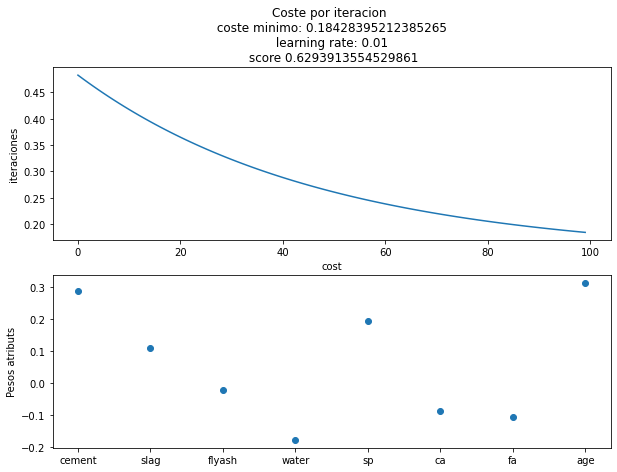

In [6]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot()

Text(0.5, 1.0, 'Coste por iteracion \n coste minimo: 0.1311337582926331 \n learning rate: 0.001 \n score 0.7525819396335194')

Text(0.5, 0, 'cost')

Text(0, 0.5, 'iteraciones')

Text(0, 0.5, 'Pesos atributs')

[]

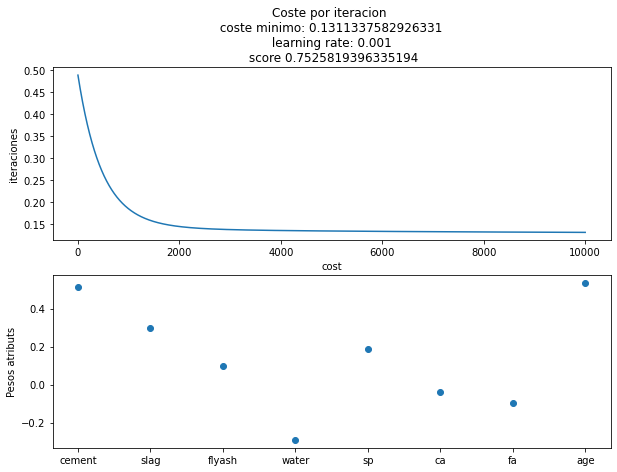

In [7]:
learningrate = 0.001
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 10000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot()

Text(0.5, 1.0, 'Coste por iteracion \n coste minimo: 0.12784329503784056 \n learning rate: 0.01 \n score 0.7563003007595281')

Text(0.5, 0, 'cost')

Text(0, 0.5, 'iteraciones')

Text(0, 0.5, 'Pesos atributs')

[]

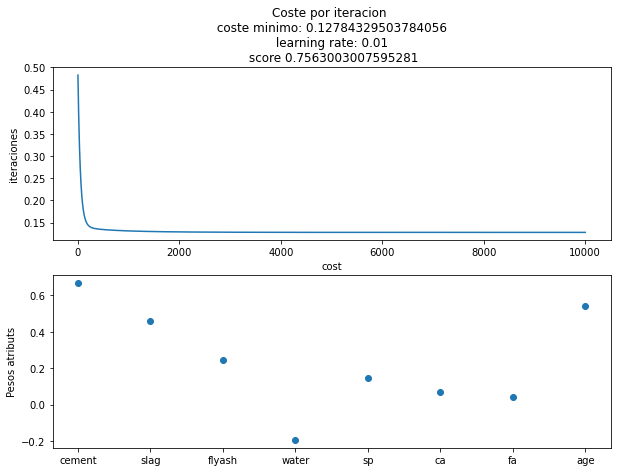

In [8]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 10000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot()

Text(0.5, 1.0, 'Coste por iteracion \n coste minimo: 0.12784309236336933 \n learning rate: 0.01 \n score 0.7563053024638886')

Text(0.5, 0, 'cost')

Text(0, 0.5, 'iteraciones')

Text(0, 0.5, 'Pesos atributs')

[]

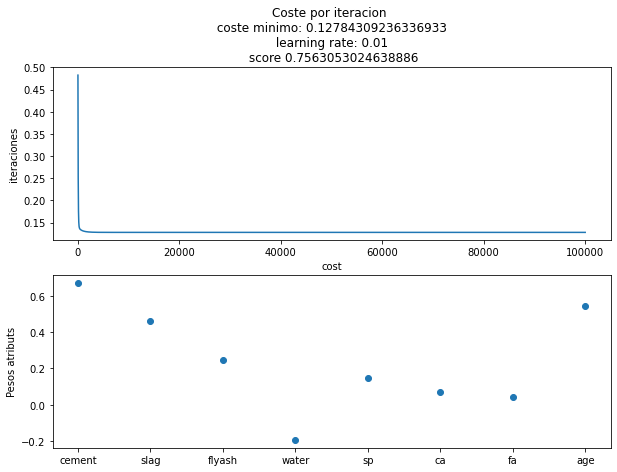

In [9]:
learningrate = 0.01
GD=Regressor(learningrate,xTrain,yTrain) #learning rate,xtrain,ytrain

iterations= 100000
W,c_history = GD.train(iterations)

b = np.zeros(iterations)
c_history = np.array(c_history)
for i in range(iterations):
    b[i] = i

y_pre = GD.predict(xTest)    

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))

ax1.plot(b,c_history)
ax1.set_title(f"Coste por iteracion \n coste minimo: {min(c_history)} \n learning rate: {learningrate} \n score {r2(y_pre,yTest)}")
ax1.set_xlabel("cost")
ax1.set_ylabel("iteraciones")

ax2.scatter(["cement","slag","flyash","water","sp","ca","fa","age"],W)
ax2.set_ylabel("Pesos atributs")
plt.plot()

Tras estas pruebas concluimos que llegados a cierto punto aumentar el numero de iteraciones no otorga una mejora importante en el modelo. En cuanto el learning rate es importante dar con un buen valor ya que si es demasiado grande el coste empezara a crecer muy pronto y nos saltaremos el mínimo, pero si es demasiado pequeño le costará muchas iteraciones llegar hasta este mismo mínimo.

Tambien vemos  en los como los atributos com mayor importancia són 'age','slag' y 'cement' como ya habiamos visto cuando mirabamos la correlación de los atributos. Destacar que 'water es el único atributo con un peso negativo y el resto tienen un peso cercano a zero.